### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [534]:
data = pd.read_csv('data/coupons.csv')

In [355]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

### Analysis of problematic data
When we run the data.info and a list of variables that are empty we find that there are a number of features that have empty values and are candidates for being removed.

We have the following:
|  | Count | Difference|value|
| --- | --- |--- |--- |
|car                   |108|12576|Removed|
|Bar                   |12577|107|missing|
|CoffeeHouse           |12467|217|less1|
|CarryAway             |12533|151|1~3|
|RestaurantLessThan20  |12554|130|1~3|
|Restaurant20To50      |12495|189|less1|
|Total number of records|12684


So, we can immediately remove "car", the others need further investigation.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

### Detect empties
we will use isna() function to detect the nulls or empties and convert them into a list

From data.info() we can see that the column "car" has only 108 out of 12684 rows, so we can easily drop <font color='red'>car</font> 


In [356]:
data.columns[data.isna().any()].tolist()

['car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [535]:
df = data.copy()

In [22]:
empty = df.columns[df.isna().any()].tolist()

for var in empty:
    unique_values, count = df[var].nunique(), df[var].value_counts()
    total = df[var].count()
    print('Unique values:', unique_values)
    print('Count:', count)
    print('Total records in', var,':', total)
    totaldf = df.shape[0]
    print('Total records in Dataframe:', totaldf)
    print("Missing:",totaldf - total)
    print("")
#    df_filtered[var] = df_filtered[var].fillna(0)


Unique values: 5
Count: car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Total records in car : 108
Total records in Dataframe: 12684
Missing: 12576

Unique values: 5
Count: Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
Total records in Bar : 12577
Total records in Dataframe: 12684
Missing: 107

Unique values: 5
Count: CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
Total records in CoffeeHouse : 12467
Total records in Dataframe: 12684
Missing: 217

Unique values: 5
Count: CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
Total records in CarryAway : 12533
Total records in Dataframe: 12684
Missing: 151

Uni

In [536]:
del df['car']
df['Bar'] = df['Bar'].fillna('missing')
df['CoffeeHouse'] = df['CoffeeHouse'].fillna('less1')
df['CarryAway'] = df['CarryAway'].fillna('1~3')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna('1~3')
df['Restaurant20To50'] = df['Restaurant20To50'].fillna('less1')


4. What proportion of the total observations chose to accept the coupon? 


Based on the information provided before:<br>
<b>Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.</b><br>
Therefore, we need to get the proportion based on the column <b>Y</b>

In [644]:
#df.coupon.value_counts(normalize=True)
df.Y.value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


4.1 To get the proportion of coupons accepted per coupon type is as follows:

In [645]:
df_plot1 = df.groupby(['coupon', 'Y']).size().reset_index(name='count')
s = df.coupon.value_counts()
df_plot1['count'] = df_plot1['count'].div(df_plot1['coupon'].map(s))
df_plot1.query('Y == 1')

,coupon,Y,count
1,Bar,1,0.410015
3,Carry out & Take away,1,0.735478
5,Coffee House,1,0.499249
7,Restaurant(20-50),1,0.441019
9,Restaurant(<20),1,0.707107


5. Use a bar plot to visualize the `coupon` column.

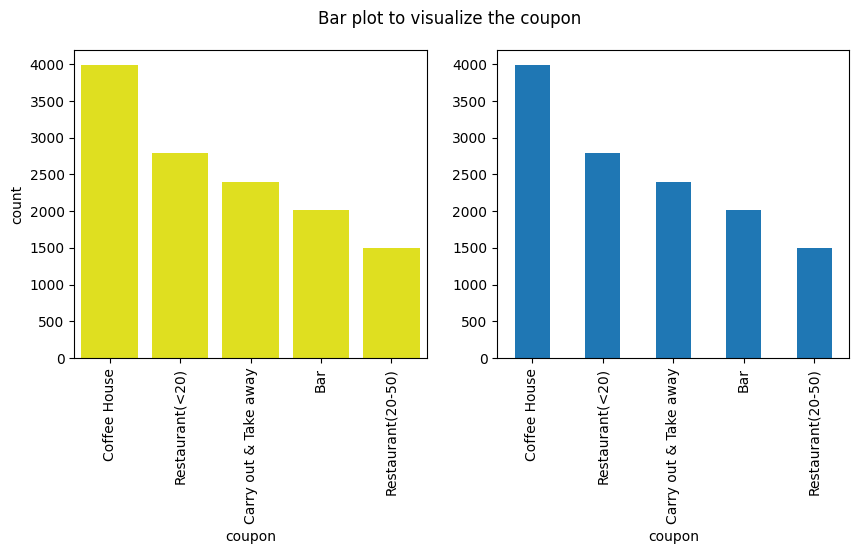

In [8]:
x = 'coupon'
y = 'Y'

orderby = df[x].value_counts().index

fig,ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Bar plot to visualize the coupon')
ax=ax.flatten()
g= sns.countplot(x=df[x],color='yellow',ax=ax[0],order=orderby)
ax[0].tick_params(axis='x', rotation=90)
df.coupon.value_counts().plot(kind='bar')
ax[1].tick_params(axis='x', rotation=90)


6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

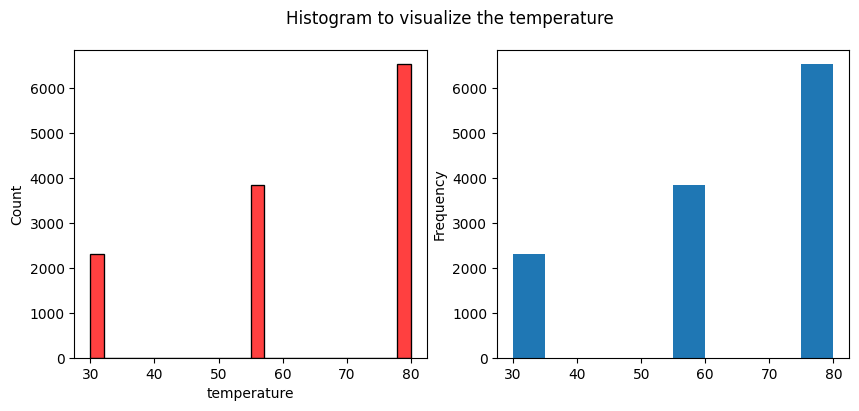

In [9]:
x = 'temperature'
y = 'Y'

fig,ax = plt.subplots(1,2, figsize=(10,4))
ax=ax.flatten()
fig.suptitle('Histogram to visualize the temperature')

g= sns.histplot(data=df,x=x, color='red',ax=ax[0])
df.temperature.plot(kind='hist')
ax[1].tick_params(axis='x', rotation=0)
df.temperature.value_counts(normalize=False)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [361]:
new_data = df.query('coupon == "Bar"')


2. What proportion of bar coupons were accepted?


In [362]:
new_data.Y.value_counts(normalize=True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [363]:
df.query('(Bar == "1~3" | Bar == "never" | Bar == "less1")').Y.value_counts(normalize=True)


Y
1    0.562052
0    0.437948
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [364]:
df.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & \
(age == "26" | age == "31" | age == "50plus" | age == "36" | age == "41" | age == "46")').Y.value_counts(normalize=True)


Y
1    0.621534
0    0.378466
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [365]:
df.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & \
(passanger != "Kid(s)") & \
(occupation != "Farming Fishing & Forestry")').Y.value_counts(normalize=True)


Y
1    0.623106
0    0.376894
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [366]:
df.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & \
    (passanger == "Friend(s)" | passanger == "Partner") & \
    (maritalStatus != "Widowed" )').Y.value_counts(normalize=True)


Y
1    0.69024
0    0.30976
Name: proportion, dtype: float64

In [99]:
df.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & \
(age == "21" | age == "below21" | age == "26" )').Y.value_counts(normalize==True)

Y
1    0.628081
0    0.371919
Name: proportion, dtype: float64

In [100]:
df.query('(RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & \
(income == "$25000 - $37499" | income == "$12500 - $24999" | income == "$37500 - $49999") ').Y.value_counts(normalize=True)

Y
1    0.593956
0    0.406044
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<div style="background-color: #f9fcff;background-image: linear-gradient(147deg, #f9fcff 0%, #dee4ea 74%);">
<h1>Observations</h1>
<ol>
    <li>Bar coupons not seem to be very popular among this population as only 41% of the population accepted the Bar coupon</li>
    <li>Drivers that go to a bar more than once a month, have passengers that are not a kid and are not widowed seem to be the best candidates for accepting the Bar coupons.
</li>
    <li>Age does not seem to be a deterministic factor as we can see people under the age of 30 that have a very similar acceptance rate to those over the age of 25. <br>However, 60% of age 41 that go less than 1 times per month accepted the Bar coupon </li>
    <li>Drivers with a Kid(s) as a passenger are less responsive to the Bar coupons</li>
    <li>Those drivers that go to a bar more than once a month are more likely to accept the Bar coupon</li>
</ol>    
</div>

<h1>Recommendations</h1>
<ol>
    <li>
        There is no information about what the discount is, perhaps increasing the discount would attract more drivers to accept the coupon
    </li>
</ol>


<div style="background-color: #fec84e;background-image: linear-gradient(315deg, #fec84e 0%, #ffdea8 74%);">
<h1>Comparison Table</h1>
<table style="background-color:white;">
    <thead style="backgroud-color:yellow">
    <tr>
        <td>coupon</td>
        <td>proportion of {COUPON} coupons were accepted</td>
        <td>acceptance rate between those who went to a {COUPON} 3 or fewer times a month to those who went more</td>
        <td>acceptance rate between drivers who go to a {COUPON} more than once a month and are over the age of 25 to the all others</td>
        <td>acceptance rate between drivers who go to a {COUPON} more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry</td>
        <td>Compare the acceptance rates between those drivers who:- go to a {COUPON} more than once a month, had passengers that were not a kid, and were not widowed</td>
        <td>go to a {COUPON} more than once a month and are under the age of 30</td>
        <td>go to cheap restaurants more than 4 times a month and income is less than 50K</td>
    </tr>
    <tr>
       <td></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
    </tr>
    </thead>
    <tbody style="backgroud-color:yellow;color:blue;">
    <tr>
        <td>Bar</td>
        <td><table><tbody><tr><td>0.589985</td><td>0.410015</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.437948</td><td>0.562052</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.378466</td><td>0.621534</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.376894</td><td>0.623106</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.30976</td><td>0.69024</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.371919</td><td>0.628081</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
    </tbody>
</table>

<h4>Note: 0 Not Accepted, 1 Accepted</h4>    
</div>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<div style="background-color: #f9fcff;background-image: linear-gradient(147deg, #f9fcff 0%, #dee4ea 74%);">
<h1>Independent Investigation</h1>
<p>The following observations are a result of the analysis carried out in the table and plots below, as they give a very comprenhensive view of the coupon acceptance among drivers.</p>
    
<h2>Observations</h2>
<ol>
    <li>
Drivers that have their Partner as a passenger and go less than 1 times a month to a Bar are the ones more likely to accept the Bar coupon
    </li>
    <li>
There is very little difference on who goes as a passenger for those who accepted the Restaurant less than 20 coupon. However, people that go 1 to 3 times a month to a restaurant less than 20 are more likely to accept this coupon.        
    </li>
    <li>
Drivers that go with their partner or with a Friend(s) and go between 1 and 3 times a month are more likely to accept the Carry Away coupon.
    </li>
    <li>
Drivers that go less than 1 times a month to a Restaurant between 20 and 50 are more likely to accept the Restaurant (20-50) coupon.
    </li>
<li>
The portion of Carry out and Take away coupons were the most accepted with 74% followed by Restaurants with less than 20 with 71%
</li>
<li>
There is no difference between those who go 3 times or less to those who go more.    
</li>
<li>
Coffee House coupon is the most popular amongst:
<ul>
    <li>
Drivers that have a Kid(s) or a Friend(s) as a passenger and go to a Coffee House 1 or 3 times a month are the more likely to accept the Coffee House coupon
    </li>
<li>
Drivers that go once a month and are over the age of 25
    </li>
    <li>
Drivers that go more than once a month, have a passenger that is not a kid and their occupation is not farming, fishing or forestry        
    </li>
    <li>
Drivers that go more than once a month, their passenger is not a kid and are not widowed
    </li>
    <li>
Drivers that go more than once a month and are under the age of 30
    </li>
</ul>    
</li>
</ol>
    
</div>
<div>
    <h1>Recommendatios</h1>
    <ol>
        <li>
            Considering that the Bar coupon the least popular. <br>Changing the expiry date of the Bar coupon could attract more customers. <br>Also, there is no evidence of this in the information provided but perhaps drink driving might be a restriction for accepting the coupon.
        </li>
        <li>Rather than inviting the customer to go to the business premises, perhaps, home delivery would be a more attractive option for the drivers.<br> 
            This could be an alternative for those that did not accept the coupon.
        </li>
        <li>As mentioned before, there is no information about what the discount is, but variations of the discount depending on the business might attract more customers. <br></li>
        <li>Drivers that go more than 8 times a month to any business are less likely to accept the coupon.<br>
        So, a different type of discount maybe necessary like a loyalty card that gives them other discounts.</li>
    </ol>
</div>


<div style="background-image: linear-gradient(315deg, #fec84e 0%, #ffdea8 74%);">
    <h1>Comparison Table</h1>
<p>In this table we can see all the values for the different criteria
</p>  
<table style="background-color:white;">
    <thead style="backgroud-color:yellow">
    <tr>
        <td>coupon</td>
        <td>proportion of {COUPON} coupons were accepted</td>
        <td>acceptance rate between those who went to a {COUPON} 3 or fewer times a month to those who went more</td>
        <td>acceptance rate between drivers who go to a {COUPON} more than once a month and are over the age of 25 to the all others</td>
        <td>acceptance rate between drivers who go to a {COUPON} more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry</td>
        <td>Compare the acceptance rates between those drivers who:- go to a {COUPON} more than once a month, had passengers that were not a kid, and were not widowed</td>
        <td>go to a {COUPON} more than once a month and are under the age of 30</td>
        <td>go to cheap restaurants more than 4 times a month and income is less than 50K</td>
    </tr>
    <tr>
        <td></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
       <td><table><tbody><tr><td>0</td><td>1</td></tr></tbody></table></td>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>Bar</td>
        <td><table><tbody><tr><td>0.589985</td><td>0.410015</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.437948</td><td>0.562052</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.378466</td><td>0.621534</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.376894</td><td>0.623106</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.30976</td><td>0.69024</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.371919</td><td>0.628081</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
    <tr>
        <td>
            Coffee House
        </td>
        <td><table><tbody><tr><td>0.500751</td><td>0.499249</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.445091</td><td>0.554909</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.374453</td><td>0.625547</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.357985</td><td>0.642015</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.27299</td><td>0.72701</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.329211</td><td>0.670789</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
    <tr>
        <td>Restaurant(<20)</td>
        <td><table><tbody><tr><td>0.292893</td><td>0.707107</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.445453</td><td>0.554547</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.436398</td><td>0.563602</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.419152</td><td>0.580848</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.336397</td><td>0.663603</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.386693</td><td>0.613307</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
    <tr>
        <td>Carry out & Take away</td>
        <td><table><tbody><tr><td>0.264522</td><td>0.735478</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.440574</td><td>0.559426</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.428049</td><td>0.571951</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.414897</td><td>0.585103</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.335053</td><td>0.664947</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.392216</td><td>0.607784</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
    <tr>
        <td>Restaurant(20-50)</td>        
        <td><table><tbody><tr><td>0.558981	</td><td>0.441019</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.439104	</td><td>0.560896</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.405635	</td><td>0.594365</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.386711	</td><td>0.613289</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.309091	</td><td>0.690909</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.34964	</td><td>0.65036</td></tr></tbody></table></td>
        <td><table><tbody><tr><td>0.406044</td><td>0.593956</td></tr></tbody></table></td>        
    </tr>
        </tbody>
</table>    
</div>

<h2>Code explanation</h2>
A function was created to plot the coupon type acceptance rate and accepts variable to examine as a parameter and the frequency of their visits.<br>
Also, the distance between the plots is passed as a parameter.


In [688]:
coupons = ["Bar","Coffee House","Restaurant(<20)","Carry out & Take away","Restaurant(20-50)"]
cols =["Bar","CoffeeHouse","RestaurantLessThan20","CarryAway","Restaurant20To50"]
count = 0

def groupbyplot(xaxisvalue, space):
    x_axis = xaxisvalue
    
    fig, axes = plt.subplots(5, 1, figsize=(10, 25))
    color = ["red","yellow","blue","pink","brown","purple"]
    count= 0
    for column, col, ax in zip(coupons, cols, axes.flatten()):
    
        df2 = df.query(f"coupon == '{column}' & Y == 1").loc[:,[f"{x_axis}",f"{col}"]]
    #    df_plot = df2.groupby(['passanger', f'{col}']).size().reset_index().pivot(columns=f'{col}', index='passanger', values=0)
    #    df_plot = df2.groupby(['passanger', f'{col}']).agg(count=(f'{col}', 'count')) 
        df_plot = df2.groupby([f"{x_axis}", f'{col}']).size().reset_index(name='count')
        s = df2[f'{x_axis}'].value_counts()
        df_plot['count'] = df_plot['count'].div(df_plot[f"{x_axis}"].map(s))
        
        g = sns.barplot(x=f"{x_axis}", 
                   y="count", 
                   hue=f"{col}", 
                   data=df_plot,
                   ax=ax) 
        ax.set_title(column.replace("_Y",""))
        ax.tick_params(axis='x', rotation=90)
        for bar in g.patches:
          
          # Using Matplotlib's annotate function and
          # passing the coordinates where the annotation shall be done
          # x-coordinate: bar.get_x() + bar.get_width() / 2
          # y-coordinate: bar.get_height()
          # free space to be left to make graph pleasing: (0, 8)
          # ha and va stand for the horizontal and vertical alignment
            g.annotate(format(bar.get_height(), '.2f'), 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=7, xytext=(0, 8),
                           textcoords='offset points')
    
        count += 1
        plt.savefig(f'images/couponanalysis_{count}.png')
    
    
    plt.subplots_adjust(hspace=space)
    fig.suptitle(x_axis) # or plt.suptitle('Main title')
    plt.show()



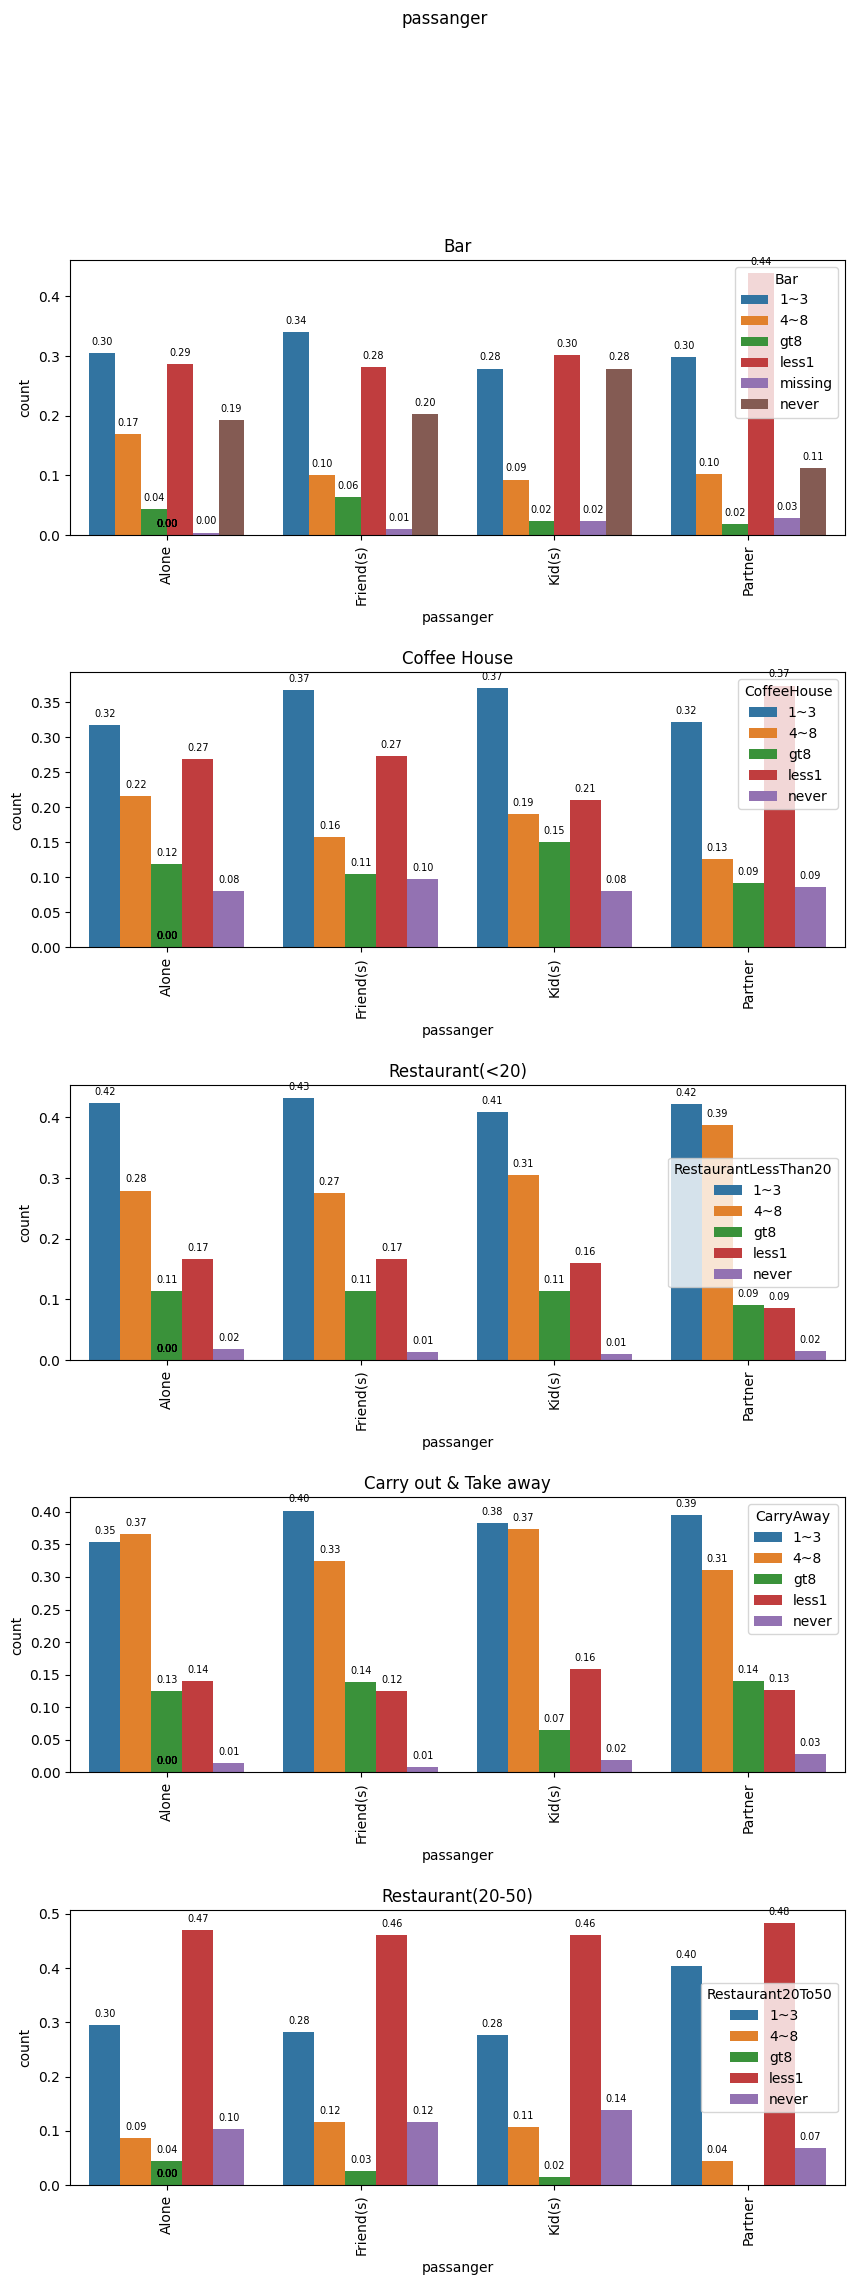

In [689]:
groupbyplot('passanger',0.5)

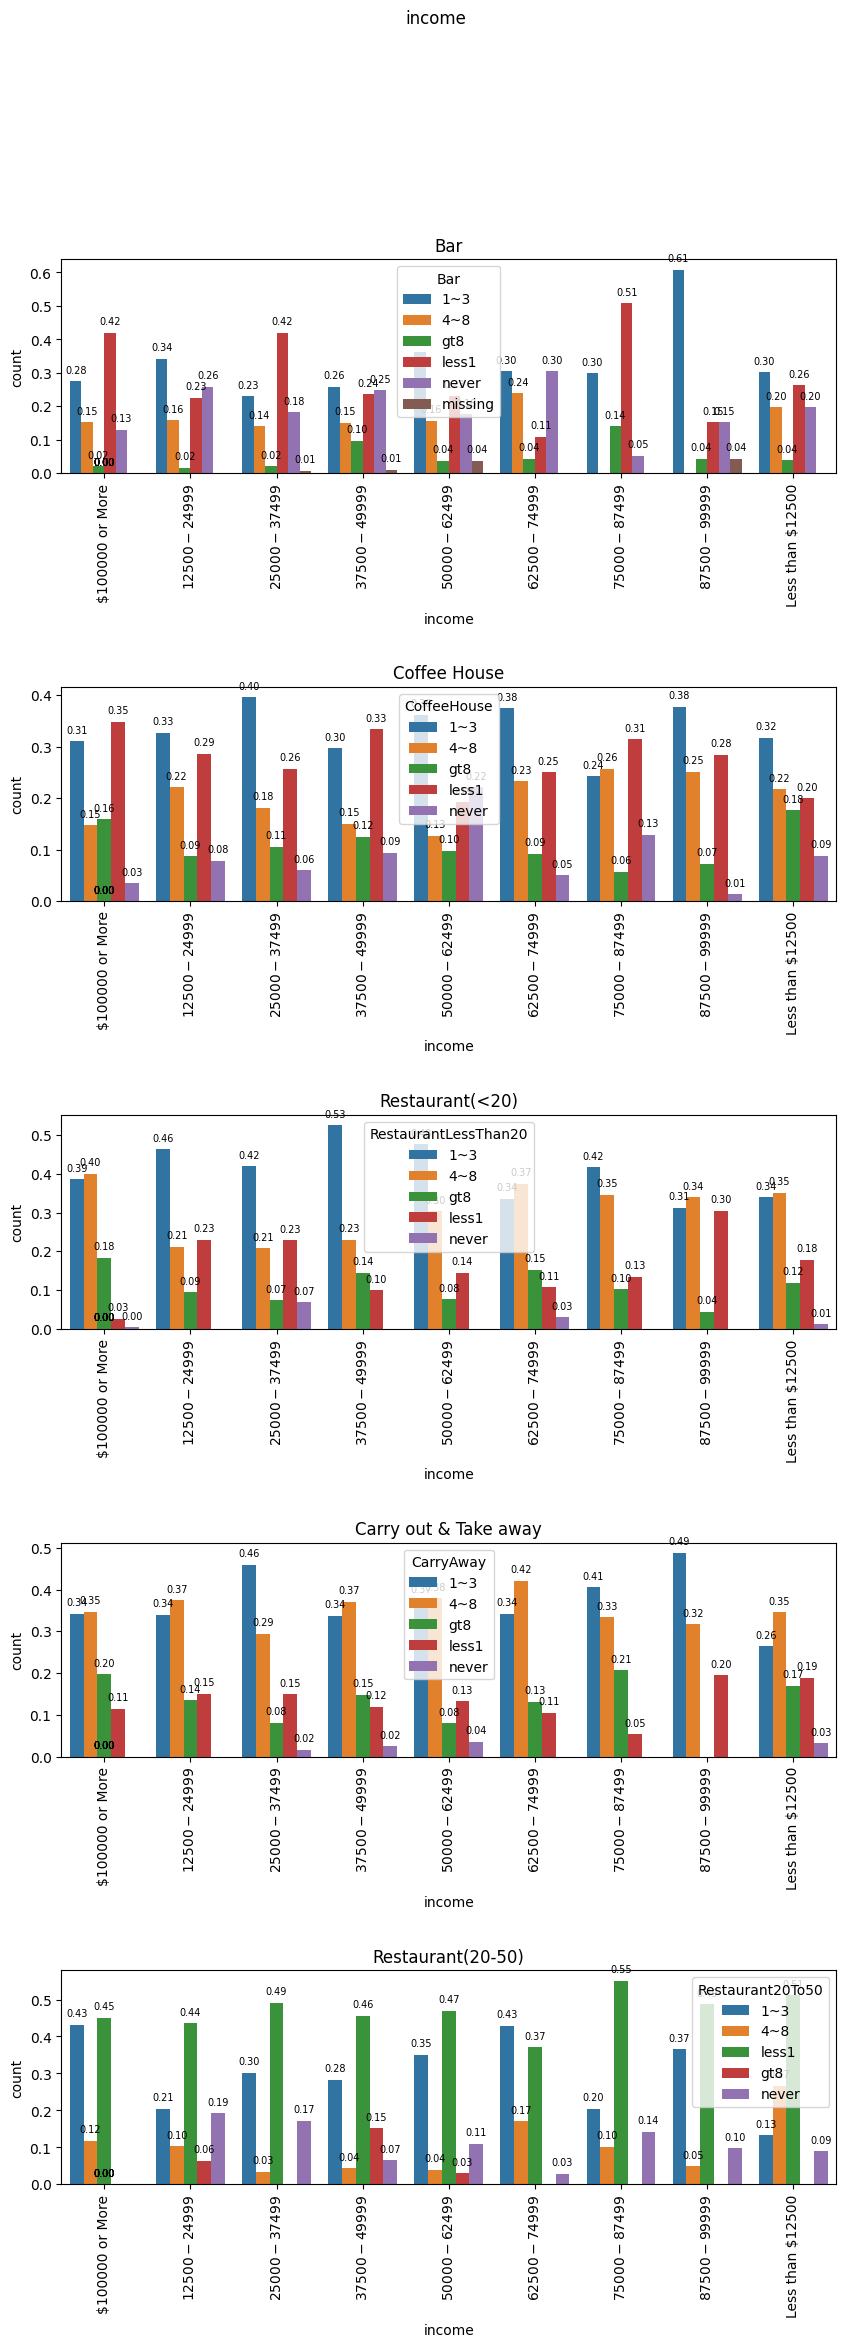

In [690]:
groupbyplot('income',1)

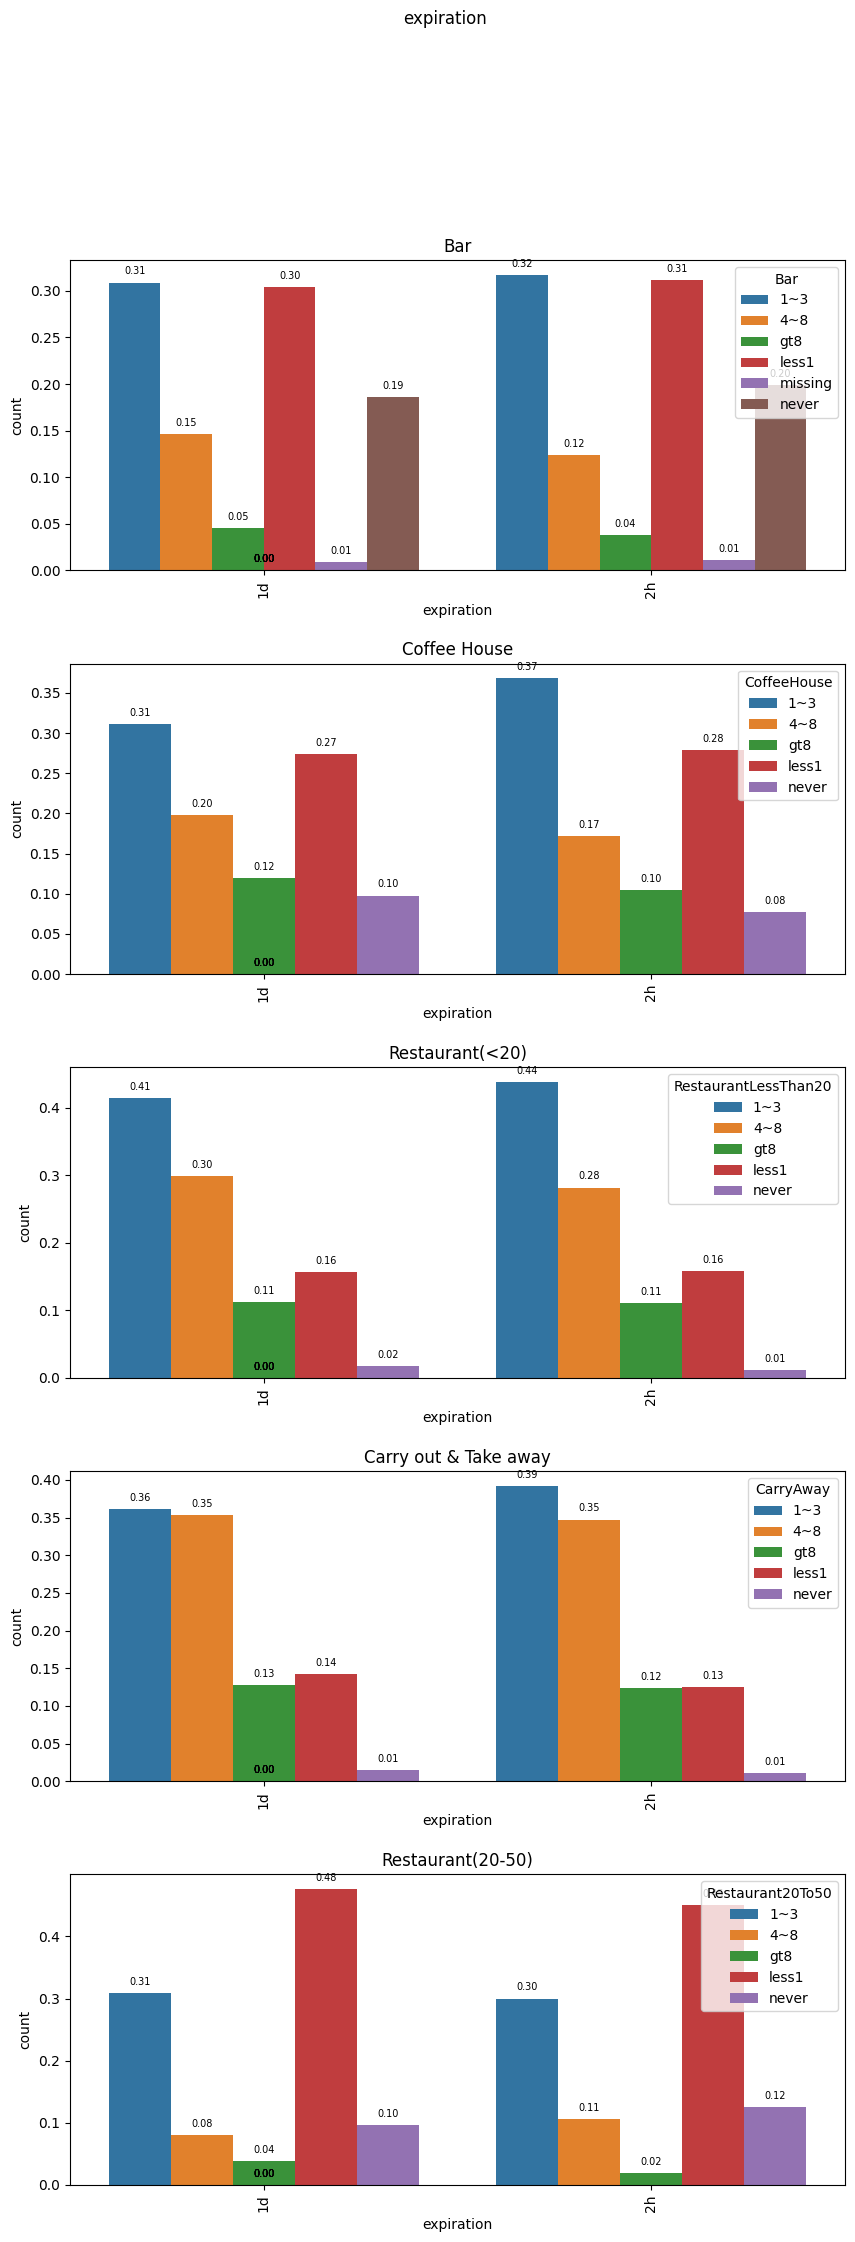

In [692]:
groupbyplot('expiration',0.3)

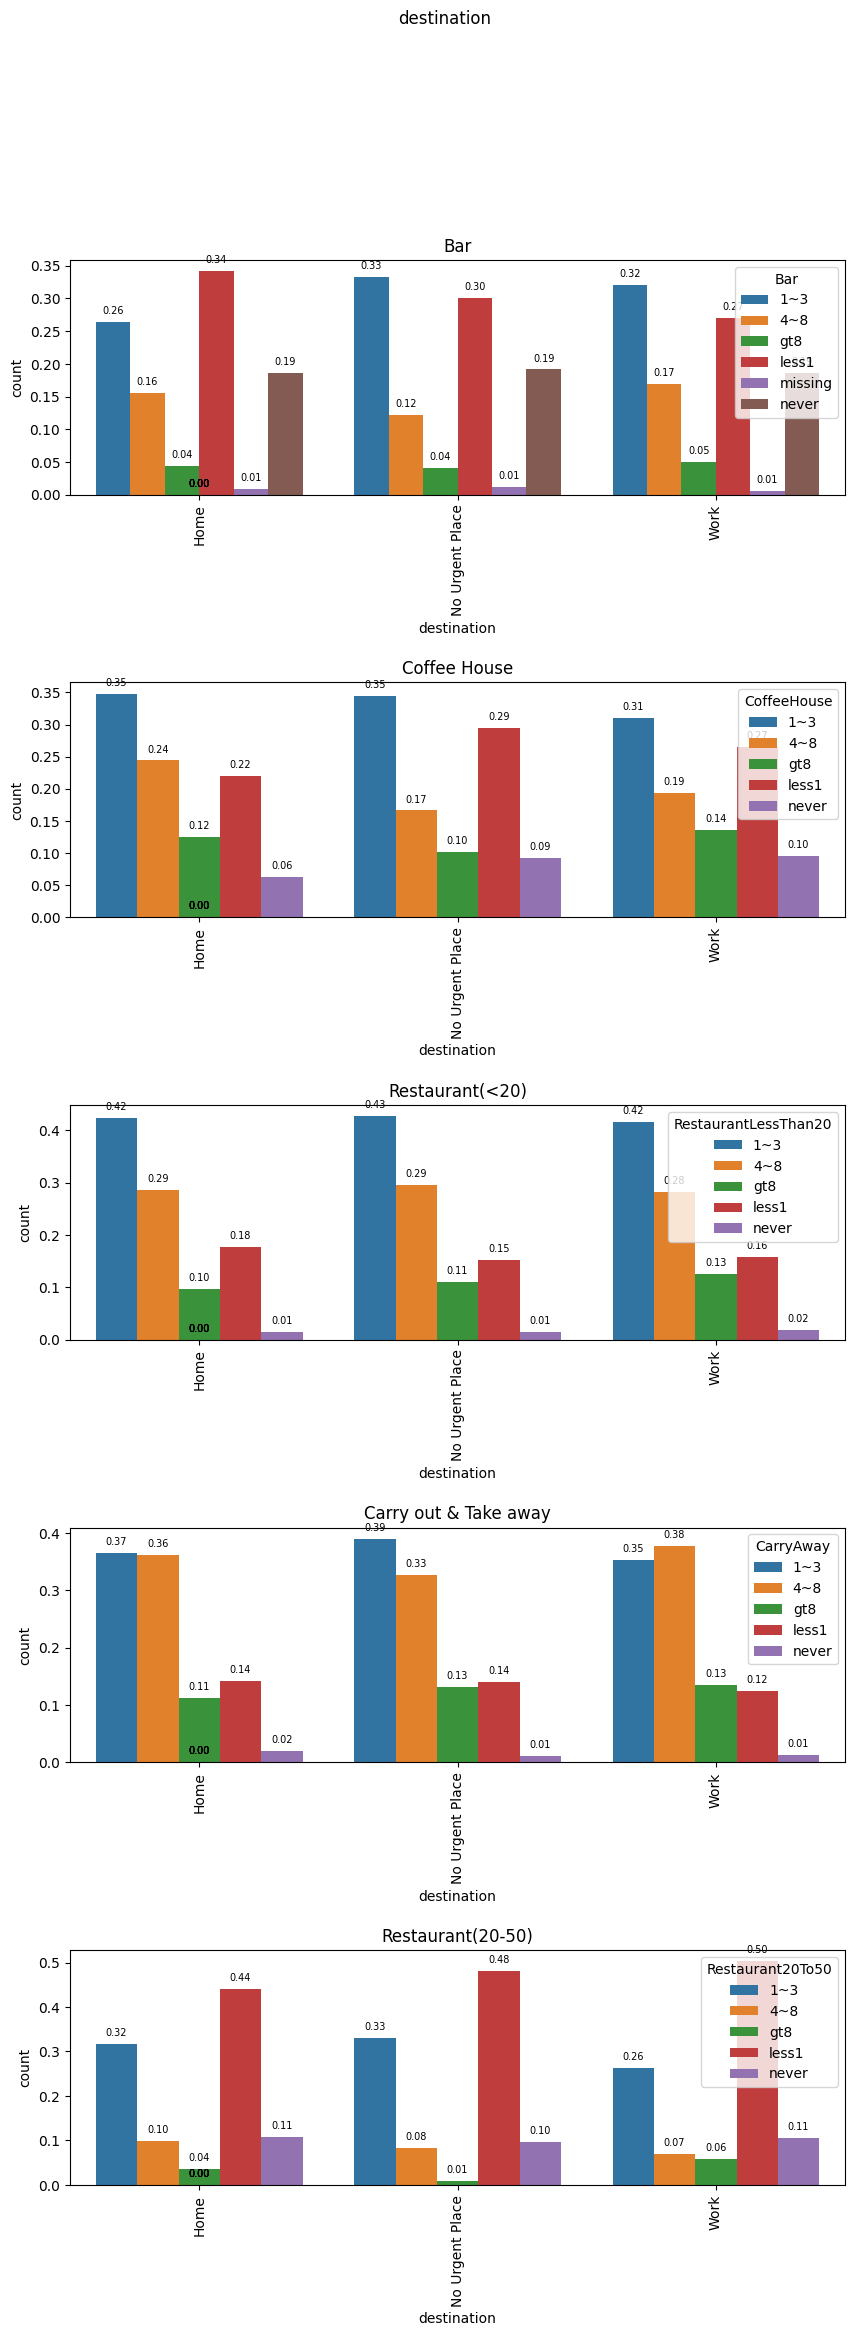

In [701]:
groupbyplot('destination',0.8)

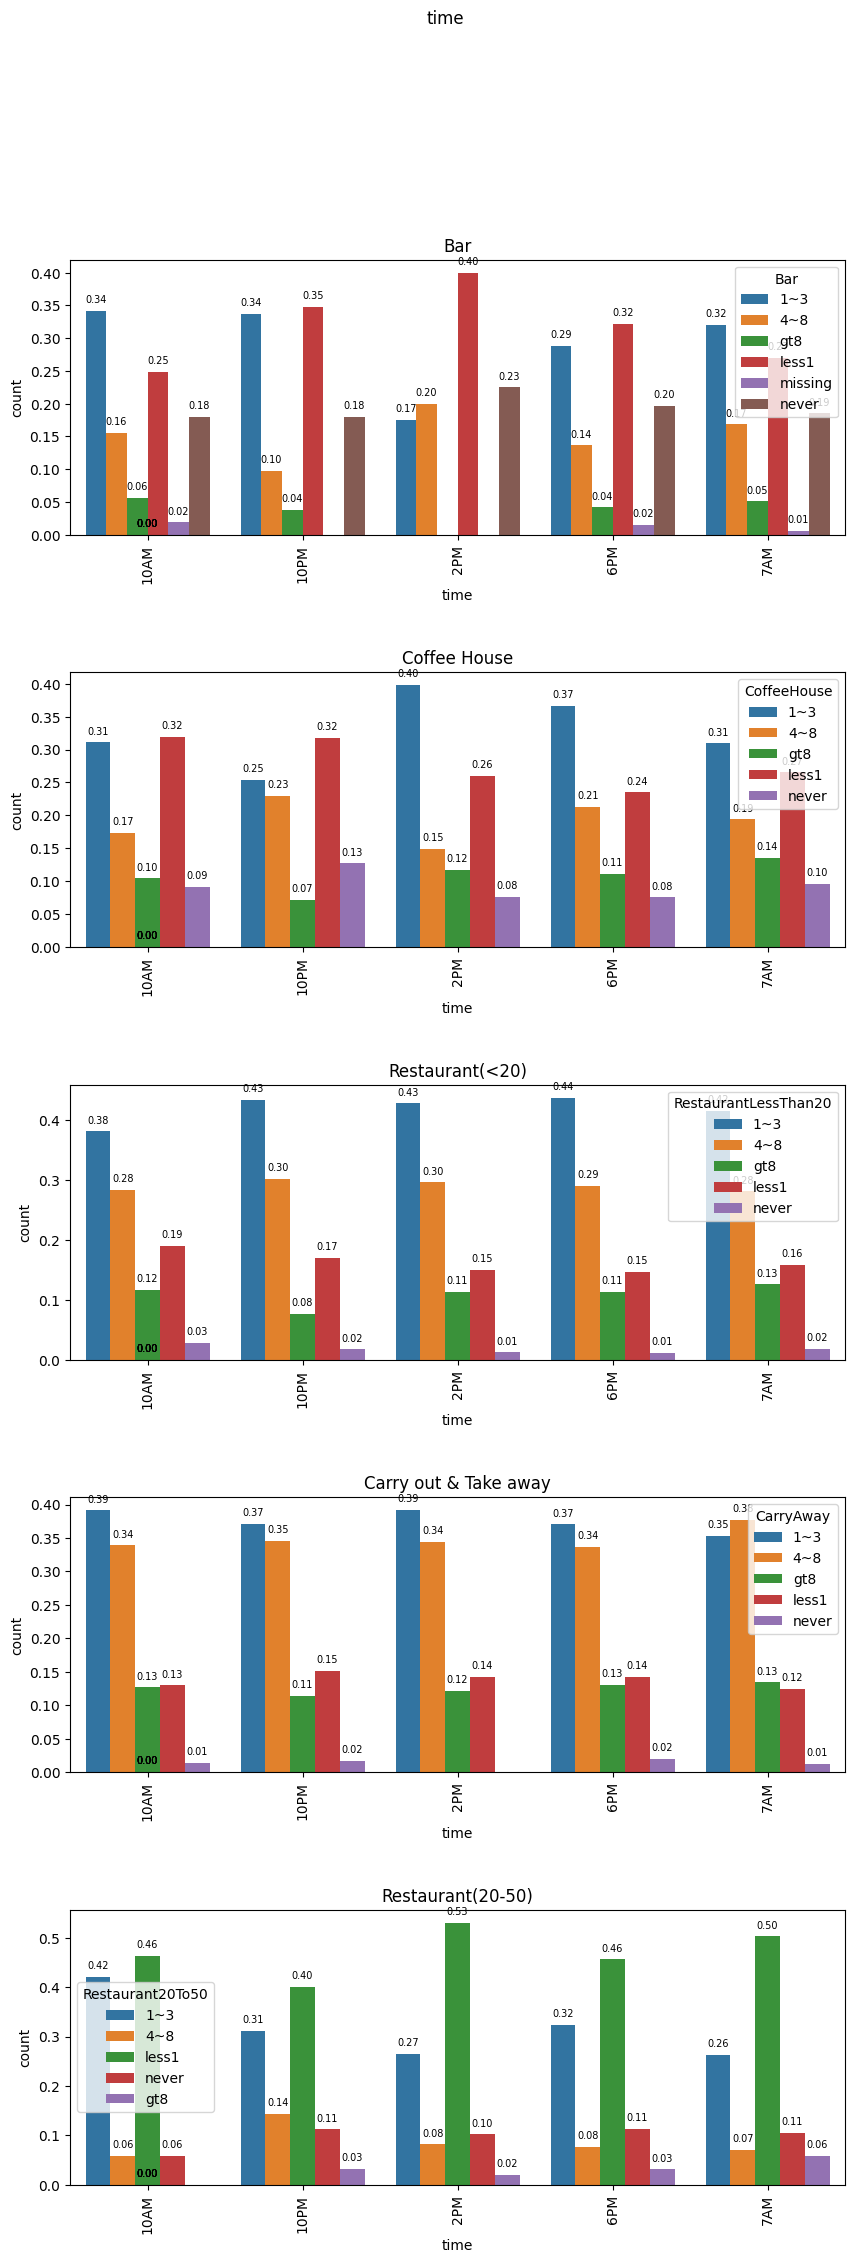

In [699]:
#groupbyplot('occupation')
#groupbyplot('education')
groupbyplot('time',0.5)


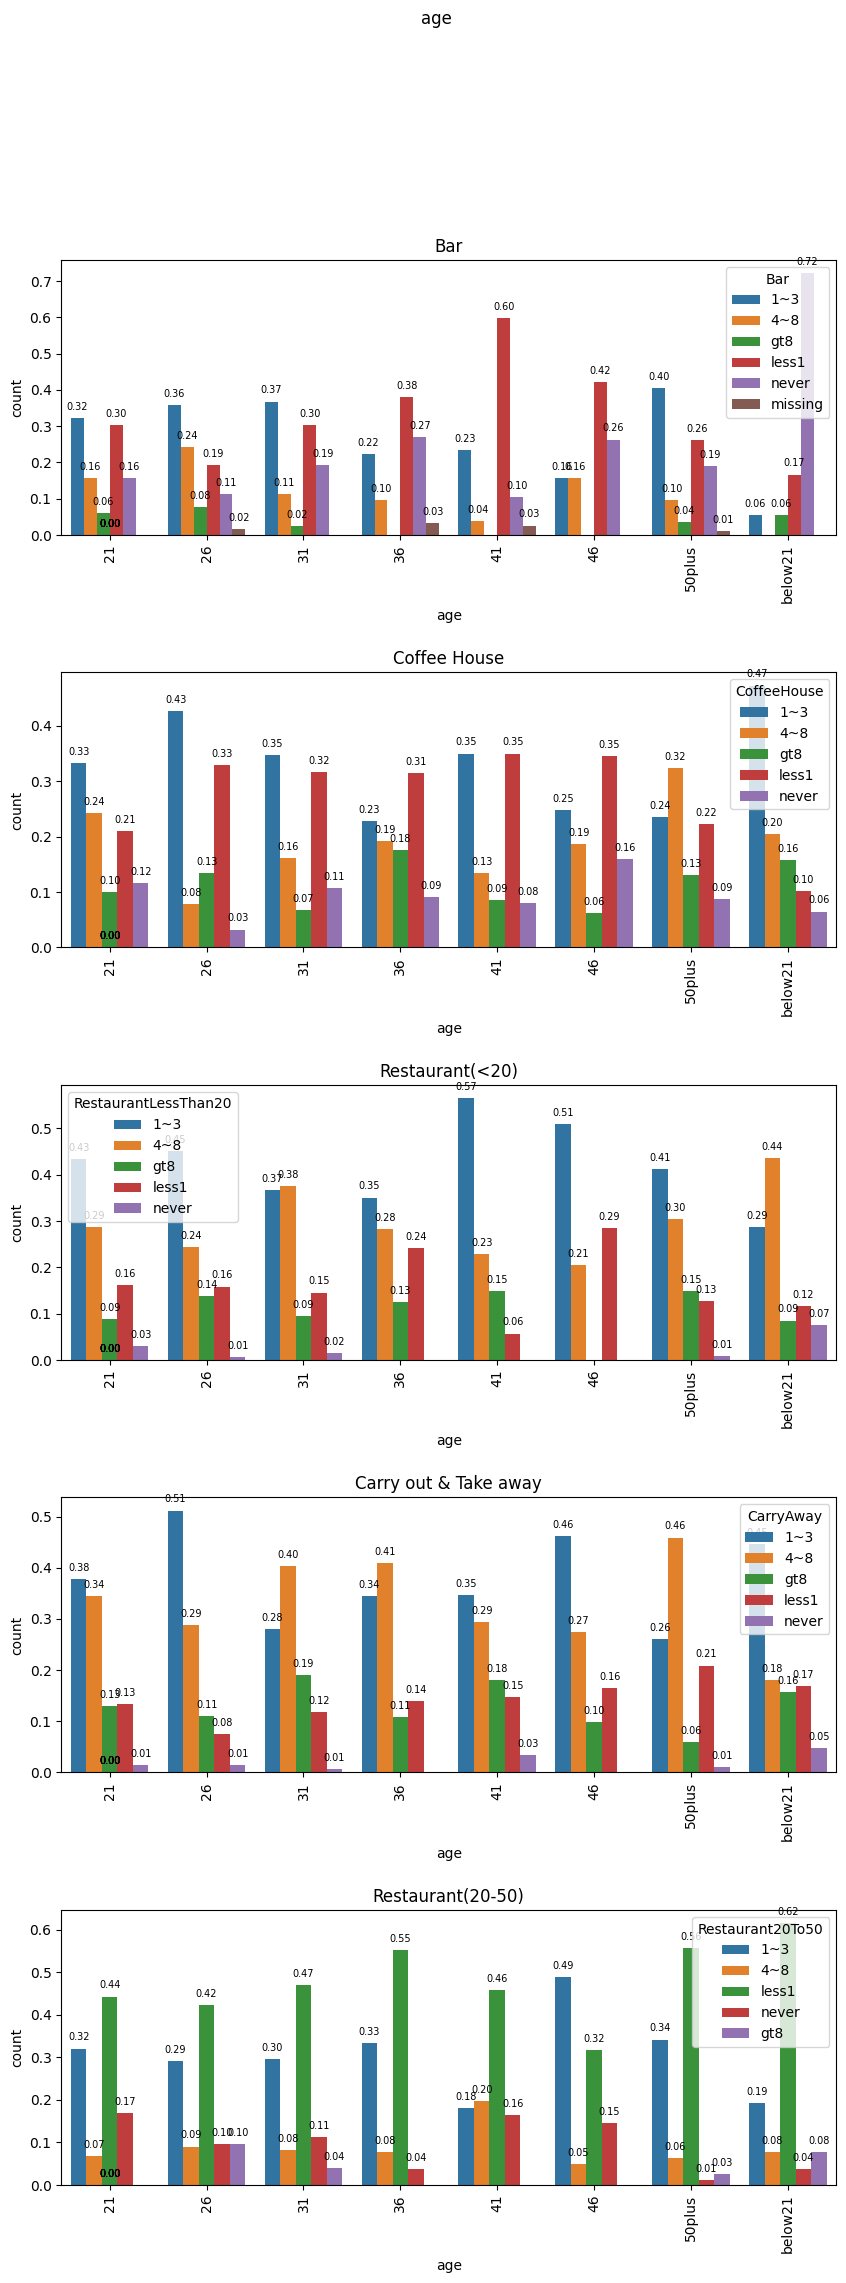

In [700]:
groupbyplot('age',0.5)


<h2>Code explanation</h2>
In the following section, I compiled all the analysis performed in the previous section as a function so it can be seen per coupon type and the results were added into the table that was presented previously as a form of summary.


In [152]:
def acceptedcoupons(coupon, var1):
    myvar = var1

    print(f"{coupon}")
    print()
    print (f"2. What proportion of {coupon} coupons were accepted?")
    new_data = data.query(f'coupon == "{coupon}"')
    var1 = new_data.Y.value_counts(normalize=True)
    print(var1)
    print()

    print(f"3. Compare the acceptance rate between those who went to a {coupon} 3 or fewer times a month to those who went more.")
    var1 = df.query(f'({myvar} == "1~3" | {myvar} == "never" | {myvar} == "less1")').Y.value_counts(normalize=True)
    print(var1)
    print()

    print(f"4. Compare the acceptance rate between drivers who go to a {myvar} more than once a month and are over the age of 25 to the all others.  Is there a difference? ")

    var1 = df.query(f'({myvar} == "1~3" | {myvar} == "4~8" | {myvar} == "gt8") & \
    (age == "26" | age == "31" | age == "50plus" | age == "36" | age == "41" | age == "46")').Y.value_counts(normalize=True)
    print(var1)
    print()

    print(f"5. Use the same process to compare the acceptance rate between drivers who go to a {myvar} more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")
    var1 = df.query(f'({myvar} == "1~3" | {myvar} == "4~8" | {myvar} == "gt8") & \
    (passanger != "Kid(s)") & \
    (occupation != "Farming Fishing & Forestry")').Y.value_counts(normalize=True)
    print(var1)
    print()
    
    print("6. Compare the acceptance rates between those drivers who:")

    print(f"- go to a {myvar} more than once a month, had passengers that were not a kid, and were not widowed *OR*")
    
    var1 = df.query(f'({myvar} == "1~3" | {myvar} == "4~8" | {myvar} == "gt8") & \
    (passanger == "Friend(s)" | passanger == "Partner") & \
    (maritalStatus != "Widowed" )').Y.value_counts(normalize=True)
    
    print(var1)
    print()

    print(f"- go to a {myvar} more than once a month and are under the age of 30 *OR*")
    
    var1 = df.query(f'( {myvar} == "1~3" | {myvar} == "4~8" | {myvar} == "gt8") & \
    (age == "21" | age == "below21" | age == "26")').Y.value_counts(normalize=True)
    print(var1)
    print()

    print(f"- go to cheap restaurants more than 4 times a month and income is less than 50K. ")
    var1 = df.query('(RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & \
    (income == "$25000 - $37499" | income == "$12500 - $24999" | income == "$37500 - $49999") ').Y.value_counts(normalize=True)    
    print(var1)
    print()
    
    return

### Coffee House

In [623]:
myvar = 'CoffeeHouse'

acceptedcoupons("Coffee House", myvar)

Coffee House

2. What proportion of Coffee House coupons were accepted?
Y
0    0.500751
1    0.499249
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.
Y
1    0.554909
0    0.445091
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and are over the age of 25 to the all others.  Is there a difference? 
Y
1    0.625547
0    0.374453
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Y
1    0.642015
0    0.357985
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:
- go to a CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed *OR*


### RestaurantLessThan20

In [154]:
myvar = 'RestaurantLessThan20'

acceptedcoupons("Restaurant(<20)",myvar)

Restaurant(<20)

2. What proportion of Restaurant(<20) coupons were accepted?
Y
1    0.707107
0    0.292893
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a Restaurant(<20) 3 or fewer times a month to those who went more.
Y
1    0.554547
0    0.445453
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a RestaurantLessThan20 more than once a month and are over the age of 25 to the all others.  Is there a difference? 
Y
1    0.563602
0    0.436398
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to a RestaurantLessThan20 more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Y
1    0.580848
0    0.419152
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:
- go to a RestaurantLessThan20 more than once a month, had passengers that were n

### Carry out & Take away


In [155]:
myvar = 'CarryAway'

acceptedcoupons("Carry out & Take away",myvar)

Carry out & Take away

2. What proportion of Carry out & Take away coupons were accepted?
Y
1    0.735478
0    0.264522
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a Carry out & Take away 3 or fewer times a month to those who went more.
Y
1    0.559426
0    0.440574
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a CarryAway more than once a month and are over the age of 25 to the all others.  Is there a difference? 
Y
1    0.571951
0    0.428049
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to a CarryAway more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Y
1    0.585103
0    0.414897
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:
- go to a CarryAway more than once a month, had passengers that were not a kid, and w

### Restaurant(20-50)


In [156]:
myvar = 'Restaurant20To50'

acceptedcoupons("Restaurant(20-50)",myvar)

Restaurant(20-50)

2. What proportion of Restaurant(20-50) coupons were accepted?
Y
0    0.558981
1    0.441019
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a Restaurant(20-50) 3 or fewer times a month to those who went more.
Y
1    0.560896
0    0.439104
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a Restaurant20To50 more than once a month and are over the age of 25 to the all others.  Is there a difference? 
Y
1    0.594365
0    0.405635
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to a Restaurant20To50 more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Y
1    0.613289
0    0.386711
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:
- go to a Restaurant20To50 more than once a month, had passengers that were not a k

In [151]:
df[(df['Bar'].isin(['1~3','4~8', 'gt8'])) & 
(df['passanger'].isin(['Friend(s)','Partner'])) & 
(df['maritalStatus'].isin(['Married partner','Single','Unmarried partner','Divorced']))].Y.value_counts(normalize=True)

df[(df['Bar'].isin(['1~3','4~8', 'gt8'])) & 
(df['age'].isin(['21','below21','26']))].Y.value_counts(normalize=True)

df[(df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
(df['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999']))].Y.value_counts(normalize=True)

Y
1    0.593956
0    0.406044
Name: proportion, dtype: float64

<h2>Code explanation</h2>
The table created in the previous section was also created as an excel spreadsheet so it can be called in the following section.

And, a function created to plot the coupon type acceptance rate per condition.


In [633]:
df2 = pd.read_csv('data/Analysis.csv')

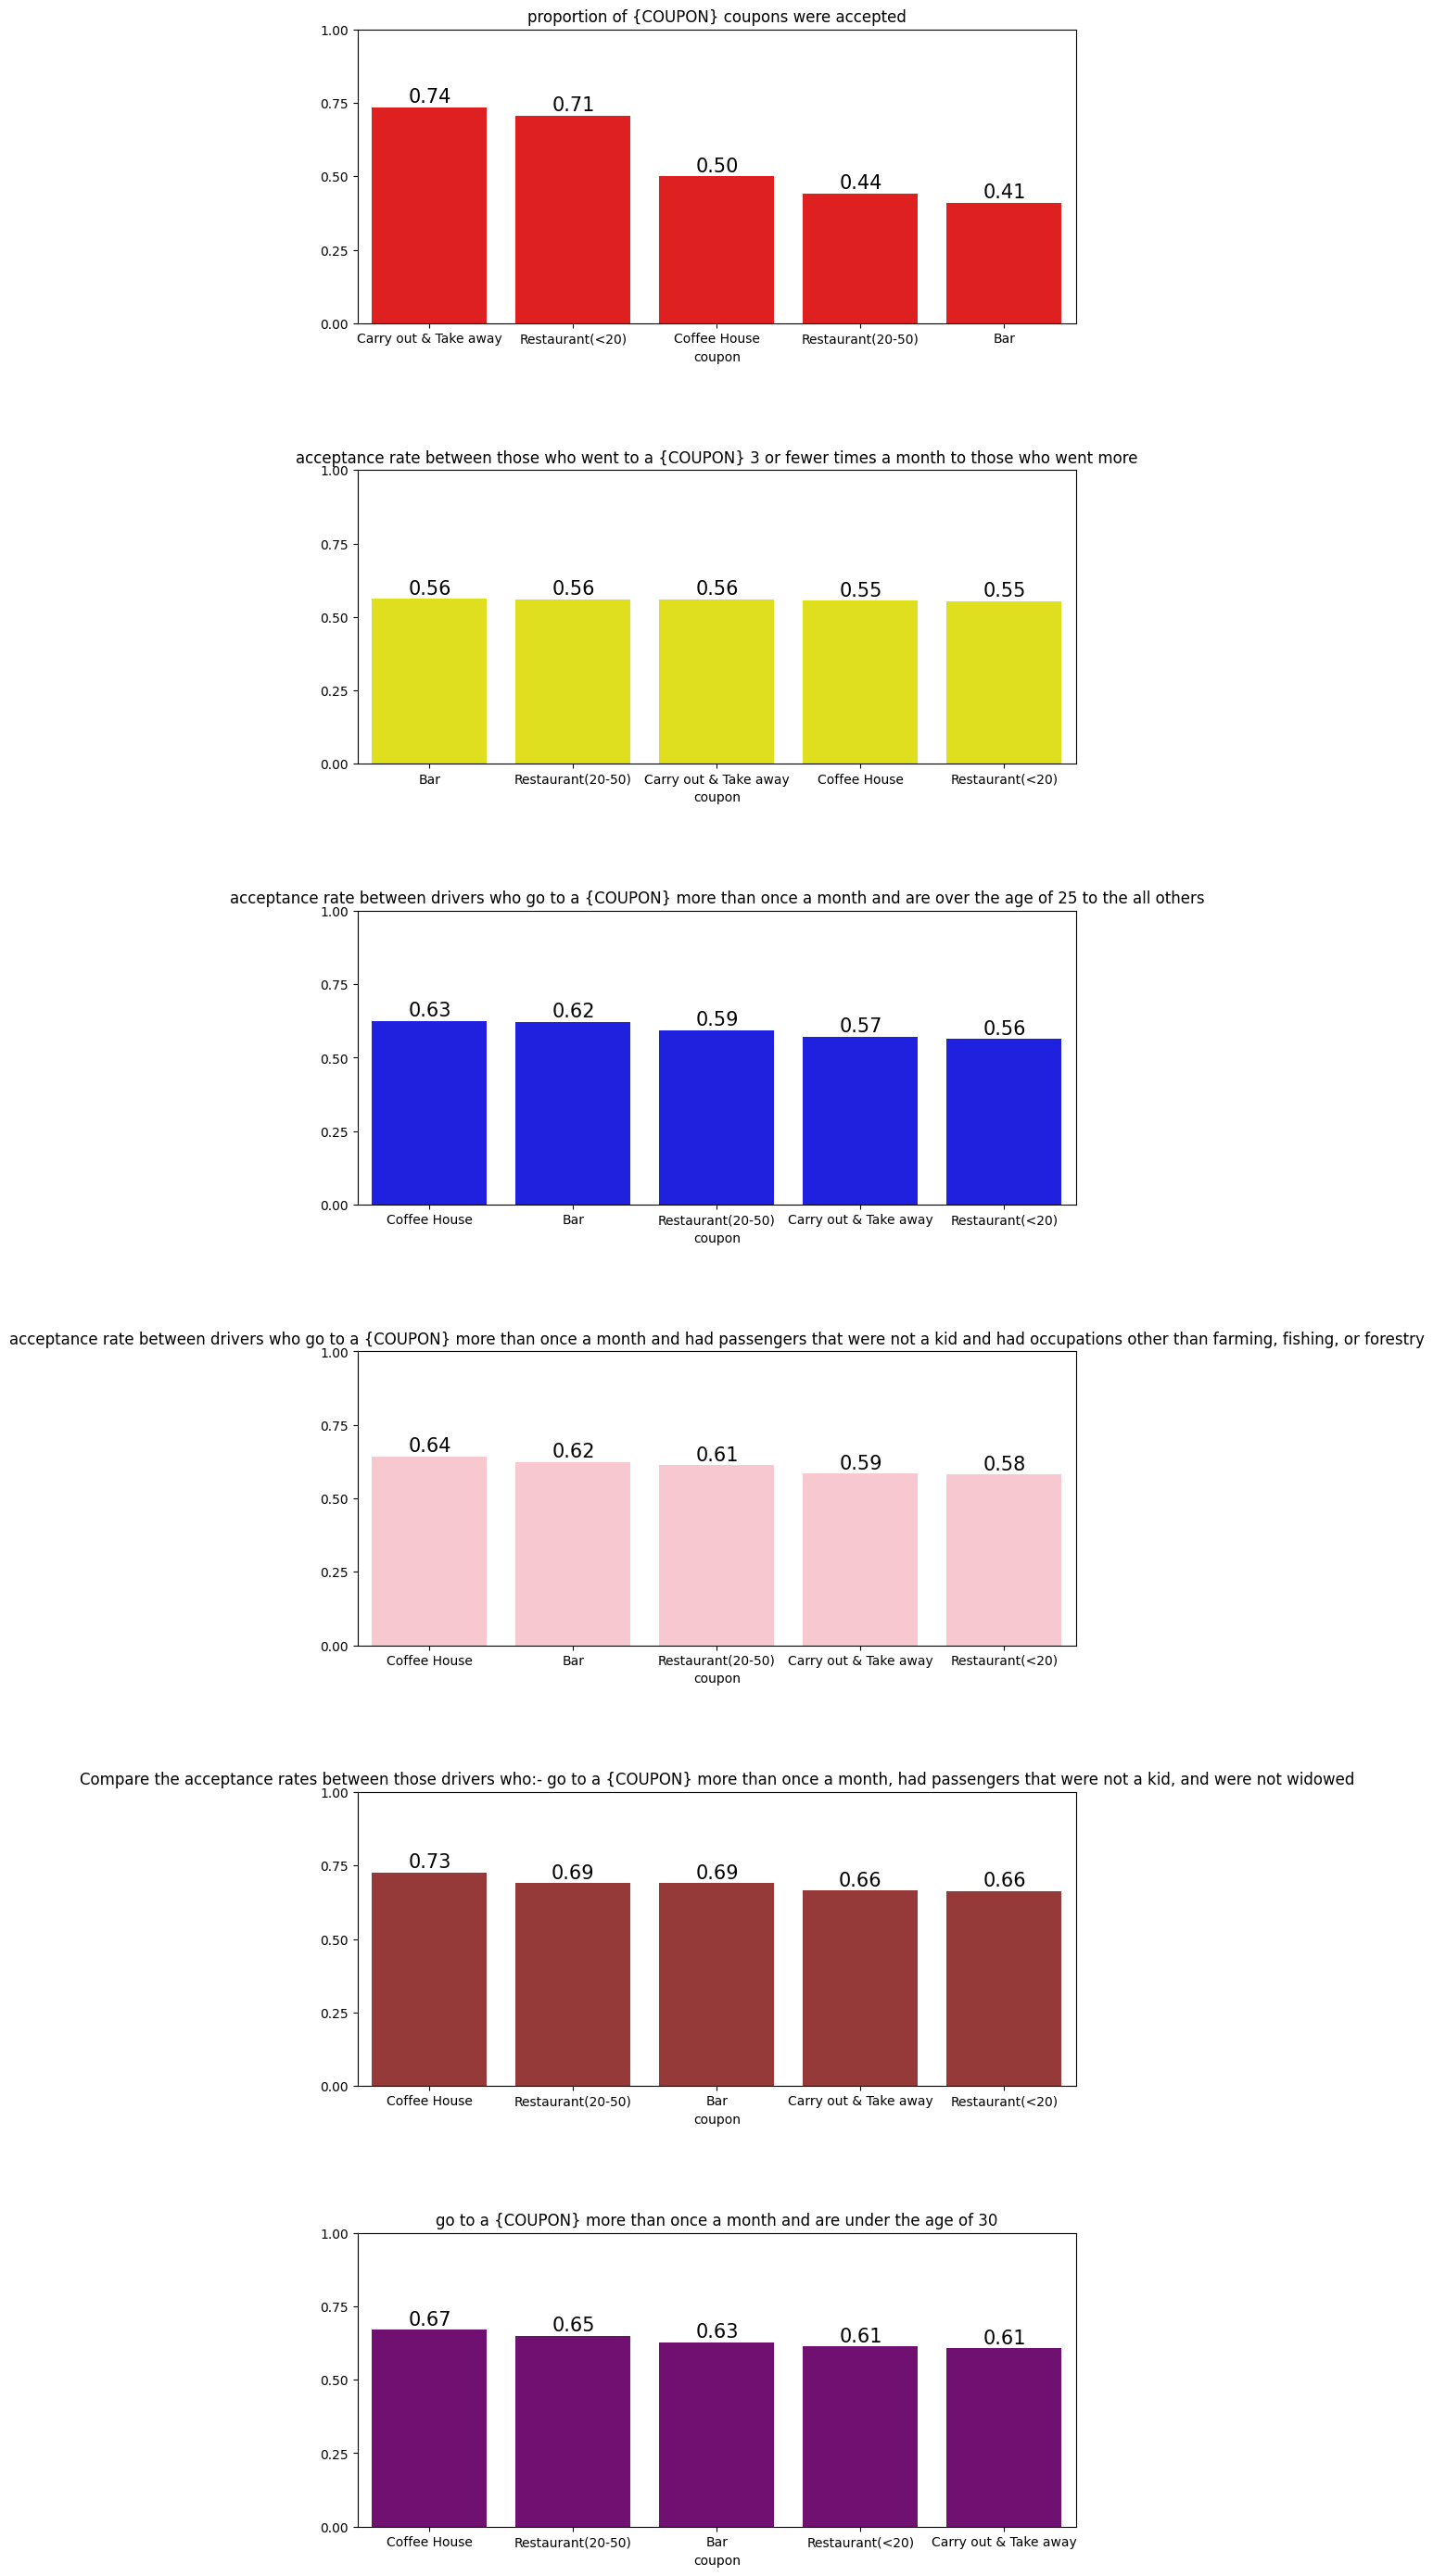

In [637]:
types = df2.columns
dummies = []
for name in types:
    if name != "coupon" and "_N" not in name and "go to cheap restaurants more than 4 times a month and income is less than 50K" not in name:
        dummies.append(name)  

count = 0
fig, axes = plt.subplots(6, 1, figsize=(10, 35))
color = ["red","yellow","blue","pink","brown","purple"]

for column, ax in zip(dummies, axes.flatten()[:7]):
    df_encoded = df2.sort_values(column,ascending=False)
    g = sns.barplot(x="coupon", y=column, orient="v",data=df_encoded,color=color[count],ax=ax)#    ax.set_title(column)
    ax.set_title(column.replace("_Y",""))
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
    ax.set_ylabel('')
    for bar in g.patches:
      
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        g.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

    count += 1
    plt.savefig(f'images/couponanalysis_2_{count}.png')


plt.subplots_adjust(hspace=0.5)

plt.show()

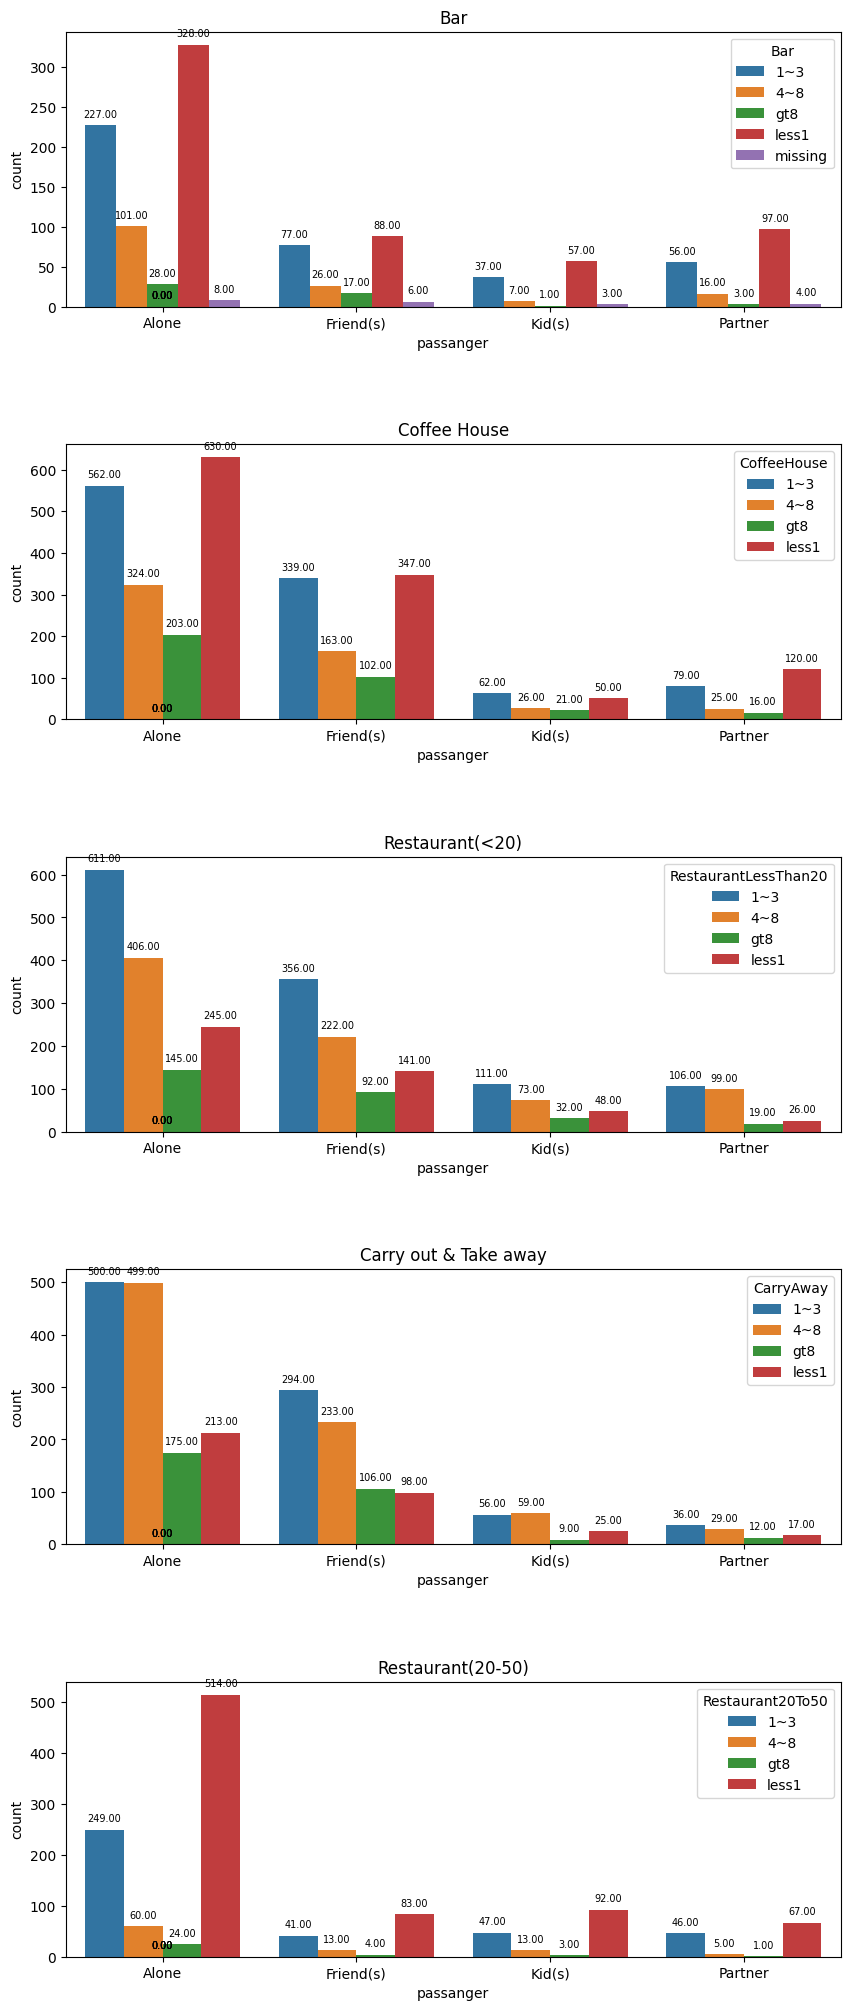

In [624]:
coupons = ["Bar","Coffee House","Restaurant(<20)","Carry out & Take away","Restaurant(20-50)"]
cols =["Bar","CoffeeHouse","RestaurantLessThan20","CarryAway","Restaurant20To50"]
count = 0

fig, axes = plt.subplots(5, 1, figsize=(10, 25))
color = ["red","yellow","blue","pink","brown","purple"]

for column, col, ax in zip(coupons, cols, axes.flatten()):
    
    df2 = df.query(f"coupon == '{column}' & {col} !='never'").loc[:,["passanger",f"{col}"]] #.value_counts().to_frame(
#    df_plot = df2.groupby(['passanger', f'{col}']).size().reset_index().pivot(columns=f'{col}', index='passanger', values=0)
    df_plot = df2.groupby(['passanger', f'{col}']).agg(count=(f'{col}', 'count')) 
#    df_plot = df2.groupby(['passanger', f'{col}']).size().reset_index(name='count')
#    s = df2.passanger.value_counts()
#    df_plot['count'] = df_plot['count'].div(df_plot['passanger'].map(s))
    
    g = sns.barplot(x="passanger", 
               y="count", 
               hue=f"{col}", 
               data=df_plot,
               ax=ax) 
#    g = df_plot.plot(kind='bar', stacked=False,ax=ax)
    ax.set_title(column.replace("_Y",""))
#    ax.set_ylabel('')
    for bar in g.patches:
      
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        g.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=7, xytext=(0, 8),
                       textcoords='offset points')

    count += 1


plt.subplots_adjust(hspace=0.5)

plt.show()
